In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [5]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [7]:
X=df.iloc[:,3:12]
y=df.iloc[:,12]

In [8]:
X

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9
...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1


In [9]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
X_train

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI
115,29,65,19,0.6,68.3,5.5,15.2,1.5,5.8
207,33,37,16,0.0,92.2,61.3,167.2,13.1,64.0
158,38,43,13,0.5,85.0,13.0,35.4,4.1,13.7
132,31,42,21,0.0,90.6,18.2,30.5,13.4,18.0
84,34,64,14,0.0,88.9,40.5,171.3,9.0,50.9
...,...,...,...,...,...,...,...,...,...
106,24,82,15,0.4,44.9,0.9,7.3,0.2,1.4
14,28,80,17,3.1,49.4,3.0,7.4,0.4,3.0
92,25,76,17,7.2,46.0,1.3,7.5,0.2,1.8
179,34,59,16,0.0,88.1,19.5,47.2,7.4,19.5


In [18]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler=StandardScaler()

In [24]:
X_train_trans=scaler.fit_transform(X_train)

In [27]:
X_train_trans

array([[-0.87563202,  0.21321832,  1.28577038, ..., -0.72275836,
        -0.79648833, -0.76790976],
       [ 0.22209084, -1.65484925,  0.14504117, ...,  2.32910654,
         1.88757476,  3.10086694],
       [ 1.5942444 , -1.25454906, -0.99568804, ..., -0.31718158,
        -0.19488798, -0.24276653],
       ...,
       [-1.97335488,  0.947102  ,  0.52528424, ..., -0.87735941,
        -1.0972885 , -1.03380506],
       [ 0.49652155, -0.18708188,  0.14504117, ..., -0.08026049,
         0.56868169,  0.14278167],
       [-0.60120131,  1.0138187 ,  2.04625653, ..., -0.85928916,
        -0.88904223, -0.99392076]])

In [29]:
X_test_trans=scaler.transform(X_test)

In [31]:
X_test_trans

array([[-0.32677059,  0.14650162, -0.2352019 , -0.38015572,  0.61070375,
        -0.07699537,  0.25303529,  0.17532762,  0.06301308],
       [ 0.22209084, -0.52066537, -0.99568804, -0.38015572,  0.71720269,
        -0.40637763, -0.41556406,  0.33729694, -0.42889324],
       [-1.15006273, -0.25379858,  0.90552731,  0.6761624 , -1.02228009,
        -0.91960114, -0.85728135, -0.86590375, -0.93409432],
       [ 0.49652155, -0.25379858, -0.99568804, -0.2841268 ,  0.09950881,
         0.26770699,  0.7389243 , -0.65765748,  0.46850342],
       [-0.60120131,  0.21321832, -0.61544497, -0.38015572,  0.51840466,
         0.06088557, -0.13447124, -0.10233408, -0.03005028],
       [ 1.86867512,  0.14650162, -2.51666033,  0.1960178 , -0.30518719,
        -0.26849668, -0.70870372, -0.88904223, -0.39565633],
       [-1.15006273,  0.8803853 ,  0.14504117, -0.38015572,  0.29120691,
        -0.82768051, -0.54004803, -0.37999578, -0.75461499],
       [ 1.31981369, -1.72156595, -0.99568804, -0.09206896,  0

In [ ]:
from sklearn.linear_model import LinearRegression

In [35]:
lr=LinearRegression()

In [36]:
lr.fit(X_train_trans,y_train)

LinearRegression()

In [37]:
y_pred=lr.predict(X_test_trans)

In [38]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9882726857720829

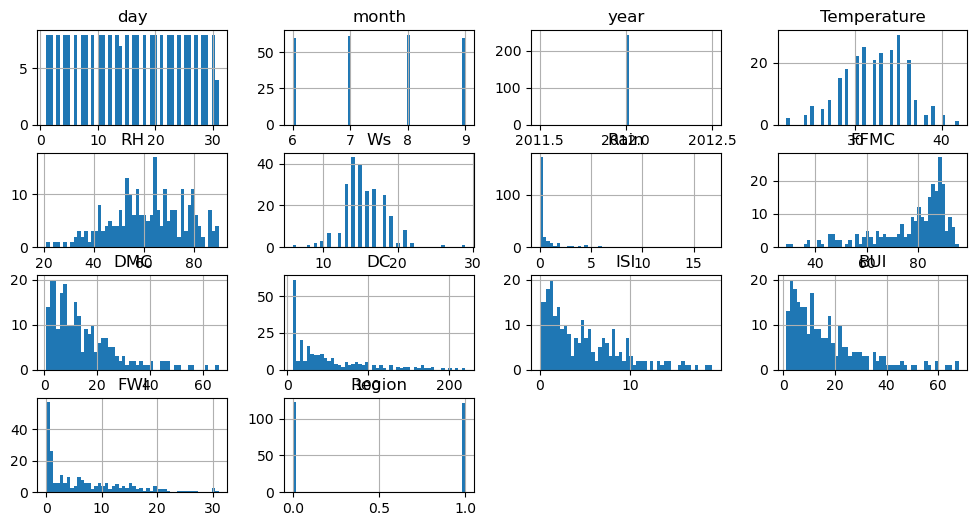

In [43]:
df.hist(bins=50,figsize=(12,6))
plt.show()

<Axes: >

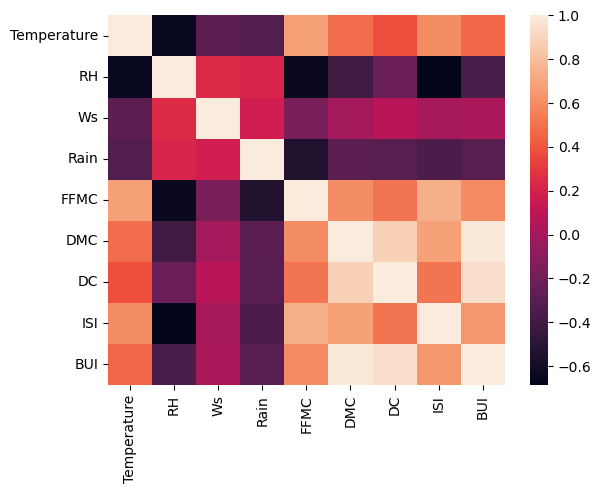

In [44]:
sns.heatmap(X.corr())

<Axes: xlabel='FWI'>

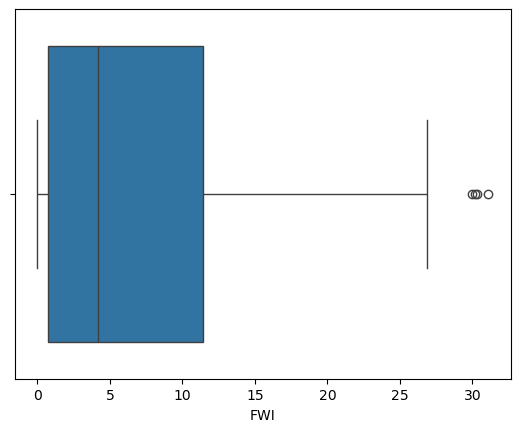

In [45]:
sns.boxplot(x='FWI',data=df)

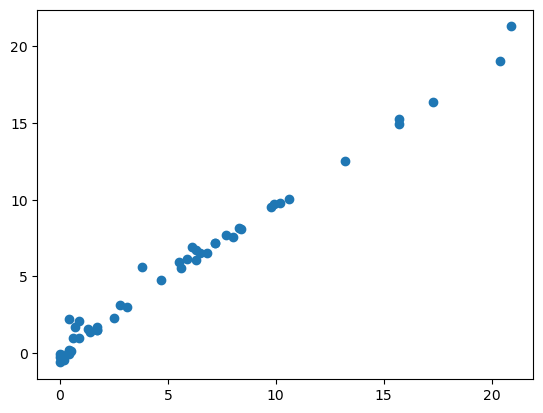

In [46]:
plt.scatter(y_test,y_pred)

In [63]:
from sklearn.model_selection import cross_val_score

In [67]:
np.mean(cross_val_score(lr,X_train_trans,y_train,scoring='r2',cv=5))

0.9549936816949913

In [69]:
scaler

StandardScaler()

In [71]:
lr

LinearRegression()

In [73]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(lr,open('ridge.pkl','wb'))